In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/home-data-for-ml-course/train.csv
/kaggle/input/peopleexample/people-example.csv
/kaggle/input/amazon-baby/amazon_baby.csv


In [2]:
path="/kaggle/input/amazon-baby/amazon_baby.csv"
df=pd.read_csv(path)
df = pd.DataFrame(df)
df.head()

,name,review,rating
0,Planetwise Flannel Wipes,"These flannel wipes are OK, but in my opinion ...",3
1,Planetwise Wipe Pouch,it came early and was not disappointed. i love...,5
2,Annas Dream Full Quilt with 2 Shams,Very soft and comfortable and warmer than it l...,5
3,Stop Pacifier Sucking without tears with Thumb...,This is a product well worth the purchase. I ...,5
4,Stop Pacifier Sucking without tears with Thumb...,All of my kids have cried non-stop when I trie...,5


In [3]:
df.shape

(183531, 3)

In [4]:
type(df['review'][0])

str

In [3]:
import pandas as pd
from collections import Counter

In [4]:
def word_count(text):
    if isinstance(text, str):  # Check if the value is a string
        words = text.split()
        return dict(Counter(words))
    else:
        return {} 

In [5]:
df['word_count'] = (df['review'].apply(word_count))


In [8]:
df.head()

,name,review,rating,word_count
0,Planetwise Flannel Wipes,"These flannel wipes are OK, but in my opinion ...",3,"{'These': 1, 'flannel': 1, 'wipes': 2, 'are': ..."
1,Planetwise Wipe Pouch,it came early and was not disappointed. i love...,5,"{'it': 2, 'came': 1, 'early': 1, 'and': 3, 'wa..."
2,Annas Dream Full Quilt with 2 Shams,Very soft and comfortable and warmer than it l...,5,"{'Very': 1, 'soft': 1, 'and': 2, 'comfortable'..."
3,Stop Pacifier Sucking without tears with Thumb...,This is a product well worth the purchase. I ...,5,"{'This': 1, 'is': 4, 'a': 2, 'product': 2, 'we..."
4,Stop Pacifier Sucking without tears with Thumb...,All of my kids have cried non-stop when I trie...,5,"{'All': 1, 'of': 1, 'my': 1, 'kids': 2, 'have'..."


# ** define what positive and negative sentiments**

In [6]:
#ignore all 3 reviews
products=df[df['rating']!=3]

In [8]:
products.head()

,name,review,rating,word_count
1,Planetwise Wipe Pouch,it came early and was not disappointed. i love...,5,"{'it': 2, 'came': 1, 'early': 1, 'and': 3, 'wa..."
2,Annas Dream Full Quilt with 2 Shams,Very soft and comfortable and warmer than it l...,5,"{'Very': 1, 'soft': 1, 'and': 2, 'comfortable'..."
3,Stop Pacifier Sucking without tears with Thumb...,This is a product well worth the purchase. I ...,5,"{'This': 1, 'is': 4, 'a': 2, 'product': 2, 'we..."
4,Stop Pacifier Sucking without tears with Thumb...,All of my kids have cried non-stop when I trie...,5,"{'All': 1, 'of': 1, 'my': 1, 'kids': 2, 'have'..."
5,Stop Pacifier Sucking without tears with Thumb...,"When the Binky Fairy came to our house, we did...",5,"{'When': 1, 'the': 5, 'Binky': 3, 'Fairy': 3, ..."


In [7]:
products['Sentiment']=(products['rating']>=4).astype(int)

/tmp/ipykernel_24/2947678064.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  products['Sentiment']=(products['rating']>=4).astype(int)


In [8]:
products.head()

,name,review,rating,word_count,Sentiment
1,Planetwise Wipe Pouch,it came early and was not disappointed. i love...,5,"{'it': 2, 'came': 1, 'early': 1, 'and': 3, 'wa...",1
2,Annas Dream Full Quilt with 2 Shams,Very soft and comfortable and warmer than it l...,5,"{'Very': 1, 'soft': 1, 'and': 2, 'comfortable'...",1
3,Stop Pacifier Sucking without tears with Thumb...,This is a product well worth the purchase. I ...,5,"{'This': 1, 'is': 4, 'a': 2, 'product': 2, 'we...",1
4,Stop Pacifier Sucking without tears with Thumb...,All of my kids have cried non-stop when I trie...,5,"{'All': 1, 'of': 1, 'my': 1, 'kids': 2, 'have'...",1
5,Stop Pacifier Sucking without tears with Thumb...,"When the Binky Fairy came to our house, we did...",5,"{'When': 1, 'the': 5, 'Binky': 3, 'Fairy': 3, ...",1


In [9]:
type(products['word_count'])

pandas.core.series.Series

In [12]:
x=products['word_count']
y=products['Sentiment']

In [13]:
from sklearn.feature_extraction import DictVectorizer
vectorizer = DictVectorizer(sparse=True)
X_transformed = vectorizer.fit_transform(x)
print("Feature names:", vectorizer.get_feature_names_out())

Feature names: ['!' '!!' '!!!' ... '~~D.Maher' '~~~' '~~~~~~~I']


In [14]:
print(X_transformed)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 9766688 stored elements and shape (166752, 283793)>
  Coords	Values
  (0, 83489)	3.0
  (0, 91004)	1.0
  (0, 103555)	1.0
  (0, 126605)	1.0
  (0, 128354)	1.0
  (0, 131845)	1.0
  (0, 158819)	1.0
  (0, 159659)	1.0
  (0, 162118)	1.0
  (0, 167849)	2.0
  (0, 168434)	1.0
  (0, 171313)	1.0
  (0, 174227)	1.0
  (0, 178731)	1.0
  (0, 186000)	1.0
  (0, 189709)	2.0
  (0, 194013)	2.0
  (0, 194520)	1.0
  (0, 199997)	1.0
  (0, 208540)	1.0
  (0, 221214)	1.0
  (0, 274726)	1.0
  (0, 279434)	1.0
  (0, 279494)	1.0
  (0, 279616)	1.0
  :	:
  (166751, 104291)	2.0
  (166751, 126294)	1.0
  (166751, 131812)	1.0
  (166751, 138152)	1.0
  (166751, 146839)	1.0
  (166751, 156314)	1.0
  (166751, 178731)	1.0
  (166751, 180904)	1.0
  (166751, 182070)	1.0
  (166751, 189384)	1.0
  (166751, 191533)	1.0
  (166751, 195900)	1.0
  (166751, 214543)	1.0
  (166751, 215774)	1.0
  (166751, 220157)	1.0
  (166751, 233175)	1.0
  (166751, 250162)	1.0
  (166751, 254216)	1.0
  

In [14]:
from sklearn import preprocessing

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=10)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=10)

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model=LogisticRegression()

In [16]:
model.fit(X_transformed,y )

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

# Evaluate

In [17]:
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.9535


In [18]:
from sklearn.metrics import confusion_matrix

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[ 4319  1026]
 [  525 27481]]


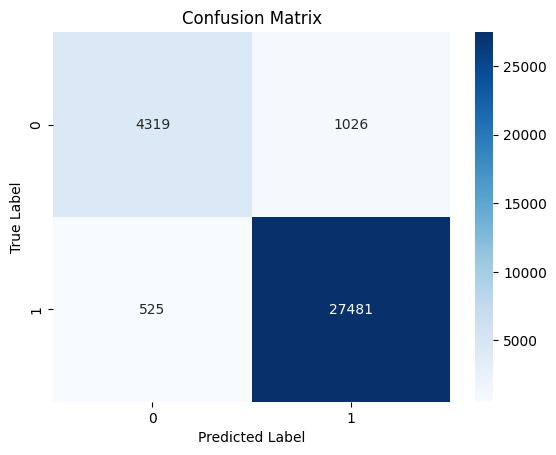

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


In [21]:
products['name'][3]

"Stop Pacifier Sucking without tears with Thumbuddy To Love\\'s Binky Fairy Puppet and Adorable Book"

In [23]:
products['y_predict'] = model.predict_proba(X_transformed)[:, 1]

/tmp/ipykernel_24/466393695.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  products['y_predict'] = model.predict_proba(X_transformed)[:, 1]


In [34]:
products.head(20)

,name,review,rating,word_count,Sentiment,y_predict
1,Planetwise Wipe Pouch,it came early and was not disappointed. i love...,5,"{'it': 2, 'came': 1, 'early': 1, 'and': 3, 'wa...",1,0.796957
2,Annas Dream Full Quilt with 2 Shams,Very soft and comfortable and warmer than it l...,5,"{'Very': 1, 'soft': 1, 'and': 2, 'comfortable'...",1,0.966616
3,Stop Pacifier Sucking without tears with Thumb...,This is a product well worth the purchase. I ...,5,"{'This': 1, 'is': 4, 'a': 2, 'product': 2, 'we...",1,0.999701
4,Stop Pacifier Sucking without tears with Thumb...,All of my kids have cried non-stop when I trie...,5,"{'All': 1, 'of': 1, 'my': 1, 'kids': 2, 'have'...",1,0.991063
5,Stop Pacifier Sucking without tears with Thumb...,"When the Binky Fairy came to our house, we did...",5,"{'When': 1, 'the': 5, 'Binky': 3, 'Fairy': 3, ...",1,0.999726
6,A Tale of Baby\'s Days with Peter Rabbit,"Lovely book, it\'s bound tightly so you may no...",4,"{'Lovely': 1, 'book,': 1, 'it\'s': 1, 'bound':...",1,0.962827
7,"Baby Tracker&reg; - Daily Childcare Journal, S...",Perfect for new parents. We were able to keep ...,5,"{'Perfect': 1, 'for': 2, 'new': 1, 'parents.':...",1,0.999940
8,"Baby Tracker&reg; - Daily Childcare Journal, S...",A friend of mine pinned this product on Pinter...,5,"{'A': 1, 'friend': 1, 'of': 2, 'mine': 1, 'pin...",1,0.958275
9,"Baby Tracker&reg; - Daily Childcare Journal, S...",This has been an easy way for my nanny to reco...,4,"{'This': 1, 'has': 1, 'been': 2, 'an': 1, 'eas...",1,0.993535
10,"Baby Tracker&reg; - Daily Childcare Journal, S...",I love this journal and our nanny uses it ever...,4,"{'I': 7, 'love': 2, 'this': 2, 'journal': 1, '...",1,1.000000


In [25]:
products['name'][3]

"Stop Pacifier Sucking without tears with Thumbuddy To Love\\'s Binky Fairy Puppet and Adorable Book"

In [35]:
pacifier = products[products['name'] == products['name'][21]]

In [36]:
pacifier.head()

,name,review,rating,word_count,Sentiment,y_predict
17,Nature\'s Lullabies Second Year Sticker Calendar,This was the only calender I could find for th...,5,"{'This': 2, 'was': 2, 'the': 4, 'only': 1, 'ca...",1,0.938424
18,Nature\'s Lullabies Second Year Sticker Calendar,I completed a calendar for my son\'s first yea...,4,"{'I': 3, 'completed': 1, 'a': 1, 'calendar': 2...",1,0.998604
19,Nature\'s Lullabies Second Year Sticker Calendar,We wanted to get something to keep track of ou...,5,"{'We': 1, 'wanted': 1, 'to': 2, 'get': 1, 'som...",1,0.940106
20,Nature\'s Lullabies Second Year Sticker Calendar,I had a hard time finding a second year calend...,5,"{'I': 5, 'had': 1, 'a': 6, 'hard': 1, 'time': ...",1,0.999979
21,Nature\'s Lullabies Second Year Sticker Calendar,I only purchased a second-year calendar for my...,2,"{'I': 4, 'only': 2, 'purchased': 1, 'a': 1, 's...",0,0.390189


In [37]:
pacifier_sorted = pacifier.sort_values(by='y_predict', ascending=False)
print(pacifier_sorted.head())


                                                name  \
22  Nature\'s Lullabies Second Year Sticker Calendar   
25  Nature\'s Lullabies Second Year Sticker Calendar   
20  Nature\'s Lullabies Second Year Sticker Calendar   
18  Nature\'s Lullabies Second Year Sticker Calendar   
24  Nature\'s Lullabies Second Year Sticker Calendar   

                                               review  rating  \
22  I LOVE this calendar for recording events of m...       5   
25  My daughter had her 1st baby over a year ago. ...       5   
20  I had a hard time finding a second year calend...       5   
18  I completed a calendar for my son\'s first yea...       4   
24  Wife loves this calender. Comes with a lot of ...       5   

                                           word_count  Sentiment  y_predict  
22  {'I': 4, 'LOVE': 1, 'this': 2, 'calendar': 2, ...          1   0.999986  
25  {'My': 1, 'daughter': 1, 'had': 1, 'her': 3, '...          1   0.999981  
20  {'I': 5, 'had': 1, 'a': 6, 'hard':

In [43]:
print(pacifier_sorted.tail(1)['review'].iloc[0])#worst review of this product

I only purchased a second-year calendar for my son because I had one for my daughter. I was really disappointed with the lack of selection available for second-year calendars in general, so I just got this one because it was one of the only ones. It\'s an okay calendar. The finish on the pages is glossy which makes it hard to write on with certain pens. The stickers aren\'t very cute and the pages are pretty old-fashioned looking. Hopefully they will come out with some other calendars for future purchasers.


In [44]:
print(pacifier_sorted.iloc[3]['review']) 

I completed a calendar for my son\'s first year and really enjoyed tracking all of his milestones and special moments - so much so that I wanted to continue in the second year since he\'s still doing amazing and fun things every day.  I really like the simple layout of the calendar and while it might not have all the questions and milestone stickers you want - at least it\'s something to keep recording all those special moments!


# model traininig for rating# 

In [65]:
X_rating=products[['rating']].values

In [66]:
print(X_rating)

[[5]
 [5]
 [5]
 ...
 [5]
 [5]
 [5]]


In [67]:
model.fit(X_rating, y)

LogisticRegression()

# Evaluate for rating value# 

In [69]:
y_rate = model.predict(X_rating)

# Calculate accuracy
accuracy = accuracy_score(y, y_rate)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 1.0000


# evaluate for selected words


In [71]:
selected_words = ['awesome', 'great', 'fantastic', 'amazing', 'love', 'horrible', 'bad', 'terrible', 'awful', 'wow', 'hate']

In [74]:
good_review=['awesome', 'great', 'fantastic', 'amazing', 'love','wow']
bad_review=['horrible', 'bad', 'terrible', 'awful',  'hate']

In [73]:

# Create the feature matrix with selected words only
X_words = []

for word_count in products['word_count']:
    # Extract counts for the selected words
    feature_vector = [word_count.get(word, 0) for word in selected_words]
    X_words.append(feature_vector)

X_words= pd.DataFrame(X_words)
X.head()

,awesome,great,fantastic,amazing,love,horrible,bad,terrible,awful,wow,hate
0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,2,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,0


In [76]:
def calculate_score(word_count, good_review, bad_review):
    # Sum of words to add
    add_sum = sum(word_count.get(word, 0) for word in good_review)
    
    # Sum of words to subtract
    subtract_sum = sum(word_count.get(word, 0) for word in bad_review)
    
    # Calculate final score
    return add_sum - subtract_sum

# Apply the function to each row in the DataFrame
products['score'] = products['word_count'].apply(lambda wc: calculate_score(wc, good_review, bad_review))

/tmp/ipykernel_24/962812539.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  products['score'] = products['word_count'].apply(lambda wc: calculate_score(wc, good_review, bad_review))


In [77]:
products.head()

,name,review,rating,word_count,Sentiment,y_predict,score
1,Planetwise Wipe Pouch,it came early and was not disappointed. i love...,5,"{'it': 2, 'came': 1, 'early': 1, 'and': 3, 'wa...",1,0.796957,1
2,Annas Dream Full Quilt with 2 Shams,Very soft and comfortable and warmer than it l...,5,"{'Very': 1, 'soft': 1, 'and': 2, 'comfortable'...",1,0.966616,0
3,Stop Pacifier Sucking without tears with Thumb...,This is a product well worth the purchase. I ...,5,"{'This': 1, 'is': 4, 'a': 2, 'product': 2, 'we...",1,0.999701,2
4,Stop Pacifier Sucking without tears with Thumb...,All of my kids have cried non-stop when I trie...,5,"{'All': 1, 'of': 1, 'my': 1, 'kids': 2, 'have'...",1,0.991063,1
5,Stop Pacifier Sucking without tears with Thumb...,"When the Binky Fairy came to our house, we did...",5,"{'When': 1, 'the': 5, 'Binky': 3, 'Fairy': 3, ...",1,0.999726,1


In [78]:
X_score=products[['score']].values

In [ ]:
from sklearn import preprocessing

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_score, y, test_size=0.2, random_state=10)
X_train, X_val, y_train, y_val = train_test_split(X_score, y_train, test_size=0.2, random_state=10)

In [80]:
model.fit(X_train, y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [81]:
y_word = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_word)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.9282


In [82]:
from sklearn.metrics import confusion_matrix

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[ 4319  1026]
 [  525 27481]]


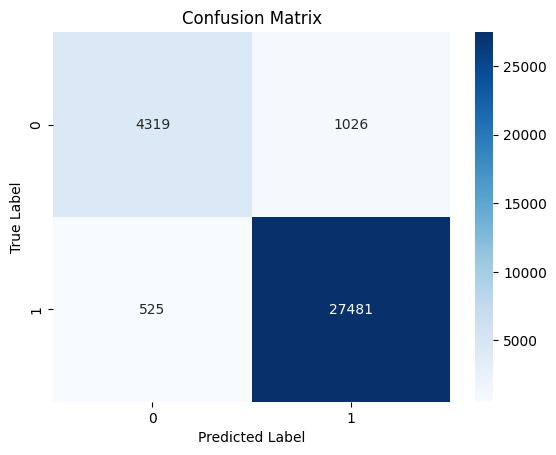

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()